In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:06<00:00, 295MB/s]
100% 1.06G/1.06G [00:06<00:00, 177MB/s]


In [7]:
#fetched data is zipped, thus unzip-

import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [9]:
#generators- divides the img data into batches, since whole data cant be processed in ram in one go
# 2 generators we making, 1 for training data, one for validation data
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int', # aasigns 0-cat, 1-dog
    batch_size=32,
    image_size=(256, 256) # our cnn model expects all img size to be same, but they are varying, so kinda reshaped them all
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int', # aasigns 0-cat, 1-dog
    batch_size=32,
    image_size=(256, 256) # our cnn model expects all img size to be same, but they are varying, so kinda reshaped them all
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# these imgs are stored in numpy form with each value ranging 0-255, thus we need to normalize(0-1)

In [11]:
#normalize-
def process(image, label):
  image=tf.cast(image/255., tf.float32 )
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [28]:
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 111ms/step - loss: 1.3370 - accuracy: 0.5723 - val_loss: 0.6681 - val_accuracy: 0.6446
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5863 - accuracy: 0.6944 - val_loss: 0.5248 - val_accuracy: 0.7458
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4909 - accuracy: 0.7649 - val_loss: 0.5775 - val_accuracy: 0.7174
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4316 - accuracy: 0.8009 - val_loss: 0.5248 - val_accuracy: 0.7290
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3703 - accuracy: 0.8349 - val_loss: 0.4534 - val_accuracy: 0.7948
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3080 - accuracy: 0.8661 - val_loss: 0.4303 - val_accuracy: 0.8034
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2396 - accuracy: 0.9021 - val_loss: 0.4963 - val_ac

In [32]:
import matplotlib.pyplot as plt

# Before

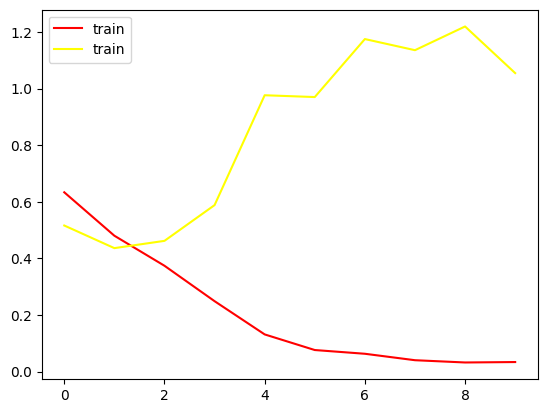

In [22]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='yellow', label='train')
plt.legend()
plt.show()

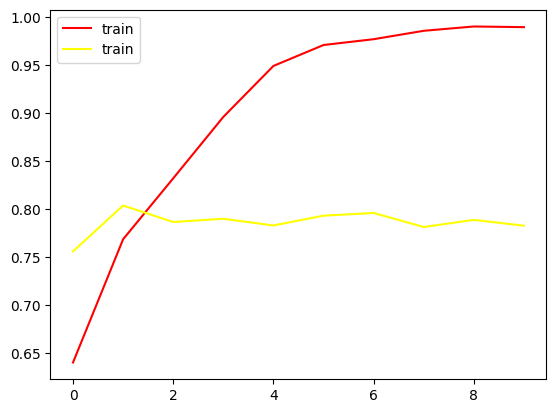

In [24]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='yellow', label='train')
plt.legend()
plt.show()

In [25]:
# overfitting :(

In [26]:
# # ways to reduce-

# add more data
# data augmentation
# l1/l2 regularization
# dropout
# batch norm
# reduce complexity

# After

In [33]:
#now-

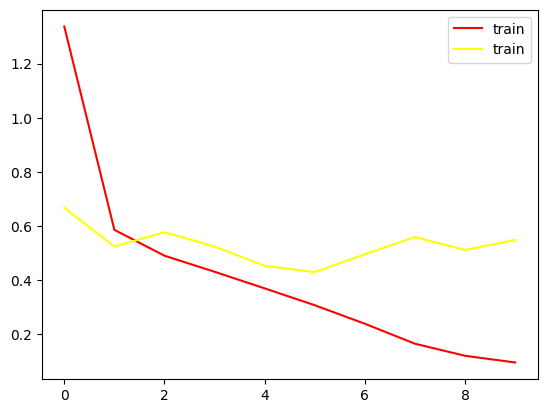

In [34]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='yellow', label='train')
plt.legend()
plt.show()

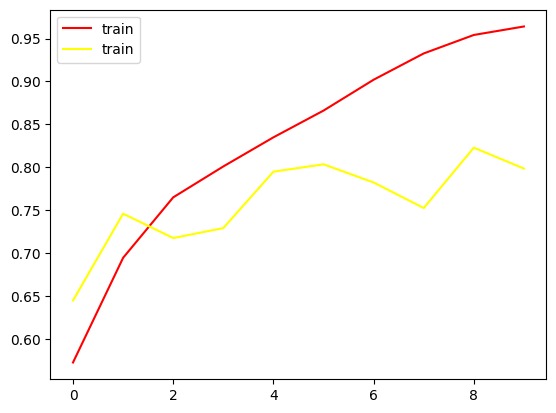

In [35]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='yellow', label='train')
plt.legend()
plt.show()

# Prediction

In [36]:
import cv2

In [48]:
test_img=cv2.imread('/content/cat.jpg') # numpy array

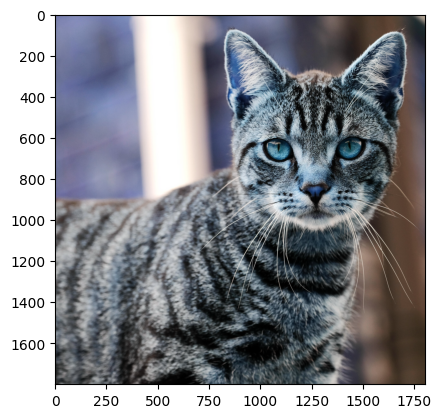

In [49]:
plt.imshow(test_img)

In [50]:
test_img.shape

(1800, 1800, 3)

In [51]:
test_img=cv2.resize(test_img,(256, 256))

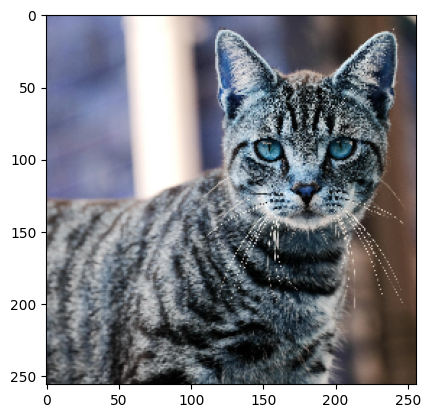

In [52]:
plt.imshow(test_img)

In [53]:
test_input=test_img.reshape((1, 256, 256, 3)) # 1 batch

In [54]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

In [55]:
# 1 => Cat, yayy!!